In [2]:
import numpy as np
from PIL import Image
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import os

from resnet18 import LandmarkDetector

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

['10437600.jpg', '27410450.jpg', '10457190.jpg', '7129030.jpg', '10501710.jpg']
image_tensor torch.Size([1, 3, 196, 196])


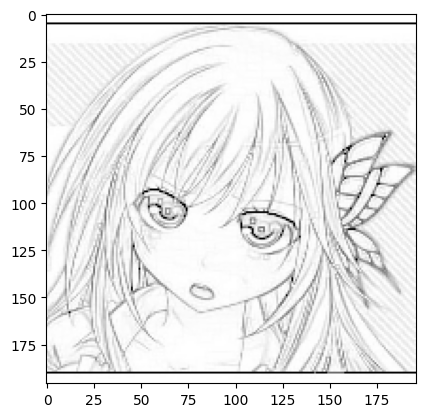

image_nichika_shape (196, 196, 3)
tensor([[0.2306, 0.4383, 0.2375, 0.4960, 0.2496, 0.5632, 0.2652, 0.6215, 0.3009,
         0.6737, 0.3431, 0.7365, 0.3961, 0.7604, 0.4574, 0.7865, 0.5094, 0.7973,
         0.5769, 0.7960, 0.6200, 0.7593, 0.6573, 0.6977, 0.6924, 0.6514, 0.7136,
         0.5852, 0.7237, 0.5200, 0.7228, 0.4496, 0.7373, 0.3978, 0.6086, 0.4050,
         0.3612, 0.4363, 0.5511, 0.4149, 0.5761, 0.3889, 0.6158, 0.3630, 0.6536,
         0.3764, 0.6779, 0.4010, 0.6853, 0.4188, 0.6495, 0.4486, 0.6133, 0.4443,
         0.5652, 0.4451, 0.5304, 0.4325, 0.2990, 0.4420, 0.3233, 0.4066, 0.3507,
         0.3886, 0.3798, 0.4086, 0.4009, 0.4269, 0.4210, 0.4442, 0.3911, 0.4608,
         0.3617, 0.4654, 0.3195, 0.4756, 0.2939, 0.4617, 0.5445, 0.3597, 0.5913,
         0.3131, 0.6289, 0.3073, 0.6707, 0.3166, 0.6962, 0.3157, 0.2849, 0.3399,
         0.3101, 0.3403, 0.3592, 0.3365, 0.4010, 0.3334, 0.4397, 0.3558, 0.4914,
         0.5436, 0.4308, 0.6432, 0.4802, 0.6487, 0.5218, 0.6369, 0.5719, 0.

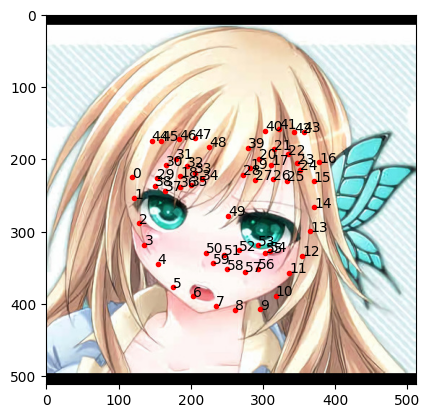

image_tensor torch.Size([1, 3, 196, 196])


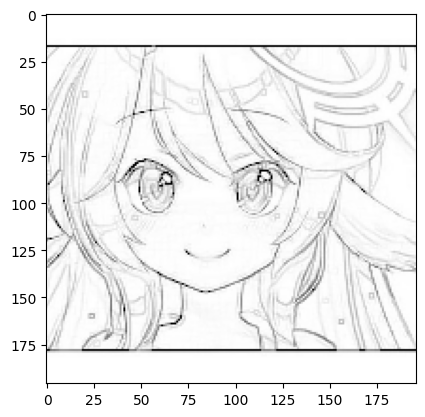

image_nichika_shape (196, 196, 3)
tensor([[0.2018, 0.4594, 0.2103, 0.5150, 0.2341, 0.5710, 0.2578, 0.6345, 0.2889,
         0.6941, 0.3510, 0.7444, 0.4018, 0.7820, 0.4581, 0.8127, 0.5311, 0.8311,
         0.5981, 0.8228, 0.6411, 0.7683, 0.6724, 0.7107, 0.7090, 0.6711, 0.7442,
         0.5995, 0.7559, 0.5295, 0.7758, 0.4642, 0.7698, 0.3992, 0.5996, 0.4040,
         0.3305, 0.4450, 0.5275, 0.4122, 0.5562, 0.4003, 0.5969, 0.3877, 0.6427,
         0.3838, 0.6831, 0.3848, 0.6882, 0.4092, 0.6526, 0.4298, 0.6043, 0.4428,
         0.5656, 0.4495, 0.5267, 0.4230, 0.2608, 0.4302, 0.2897, 0.4116, 0.3262,
         0.4064, 0.3618, 0.4337, 0.4009, 0.4398, 0.4060, 0.4585, 0.3682, 0.4706,
         0.3292, 0.4787, 0.2975, 0.4790, 0.2787, 0.4507, 0.5376, 0.3315, 0.5748,
         0.3052, 0.6242, 0.3024, 0.6677, 0.3017, 0.7129, 0.3136, 0.2236, 0.3549,
         0.2567, 0.3420, 0.3137, 0.3375, 0.3571, 0.3373, 0.3961, 0.3381, 0.4830,
         0.5579, 0.4400, 0.6691, 0.4871, 0.6781, 0.5416, 0.6717, 0.5823, 0.

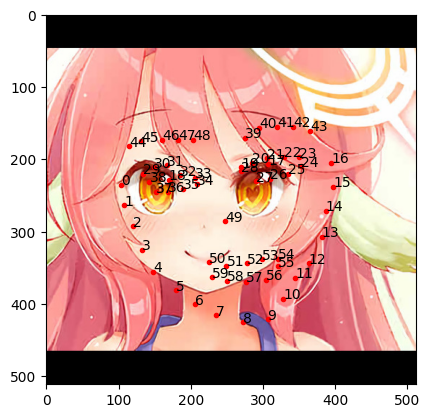

image_tensor torch.Size([1, 3, 196, 196])


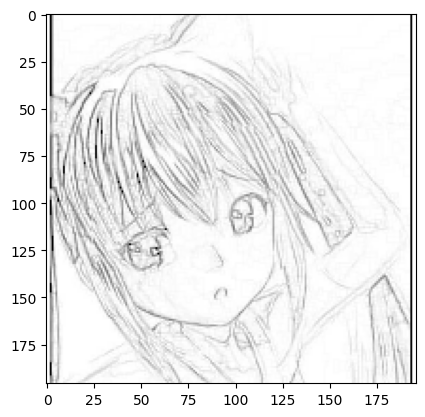

image_nichika_shape (196, 196, 3)
tensor([[0.2144, 0.4031, 0.2099, 0.4637, 0.2435, 0.5393, 0.2612, 0.6142, 0.3012,
         0.6830, 0.3390, 0.7515, 0.3994, 0.8039, 0.4651, 0.8340, 0.5110, 0.8528,
         0.5940, 0.8404, 0.6465, 0.7869, 0.6987, 0.7099, 0.7324, 0.6472, 0.7674,
         0.5577, 0.7846, 0.4874, 0.7972, 0.4053, 0.7941, 0.3251, 0.6203, 0.3710,
         0.3421, 0.3911, 0.5495, 0.3778, 0.5714, 0.3532, 0.6117, 0.3511, 0.6517,
         0.3512, 0.6975, 0.3605, 0.6932, 0.3845, 0.6555, 0.4087, 0.6128, 0.4172,
         0.5655, 0.4202, 0.5368, 0.4046, 0.2649, 0.3937, 0.2943, 0.3878, 0.3308,
         0.3788, 0.3697, 0.3994, 0.3972, 0.4124, 0.4081, 0.4281, 0.3695, 0.4424,
         0.3250, 0.4434, 0.2898, 0.4466, 0.2584, 0.4232, 0.5259, 0.3242, 0.5822,
         0.2989, 0.6337, 0.2851, 0.6802, 0.2752, 0.7316, 0.2527, 0.2029, 0.2861,
         0.2704, 0.2992, 0.3140, 0.3151, 0.3673, 0.3156, 0.3925, 0.3426, 0.4376,
         0.5622, 0.4400, 0.6726, 0.4786, 0.6780, 0.5213, 0.6676, 0.5686, 0.

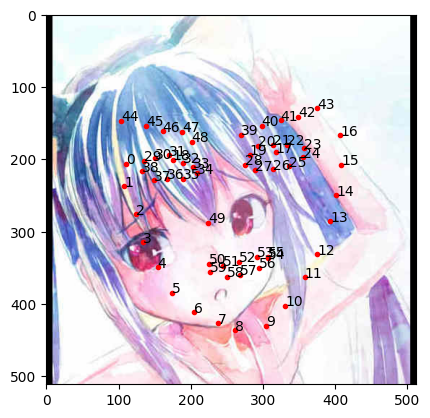

image_tensor torch.Size([1, 3, 196, 196])


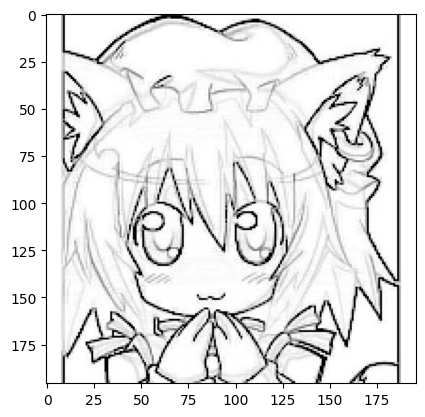

image_nichika_shape (196, 196, 3)
tensor([[0.2369, 0.4626, 0.2442, 0.5148, 0.2504, 0.5851, 0.2830, 0.6451, 0.3025,
         0.6932, 0.3693, 0.7538, 0.4142, 0.7796, 0.4824, 0.8174, 0.5378, 0.8341,
         0.6021, 0.8169, 0.6598, 0.7698, 0.7031, 0.7182, 0.7419, 0.6812, 0.7570,
         0.6020, 0.7794, 0.5337, 0.7993, 0.4657, 0.8149, 0.3980, 0.6360, 0.3958,
         0.3857, 0.4462, 0.5835, 0.4003, 0.6132, 0.3593, 0.6398, 0.3445, 0.6825,
         0.3549, 0.7143, 0.3795, 0.7170, 0.4052, 0.6928, 0.4276, 0.6608, 0.4547,
         0.6184, 0.4552, 0.5795, 0.4224, 0.3170, 0.4498, 0.3514, 0.4191, 0.3724,
         0.3708, 0.4248, 0.3878, 0.4538, 0.4342, 0.4529, 0.4396, 0.4331, 0.4706,
         0.3979, 0.4739, 0.3549, 0.4941, 0.3204, 0.4576, 0.5690, 0.3198, 0.6172,
         0.3057, 0.6555, 0.2854, 0.7079, 0.2731, 0.7357, 0.2966, 0.2859, 0.3640,
         0.3086, 0.3393, 0.3646, 0.3214, 0.4206, 0.3324, 0.4700, 0.3371, 0.5493,
         0.5546, 0.4500, 0.6347, 0.4903, 0.6302, 0.5439, 0.6223, 0.5867, 0.

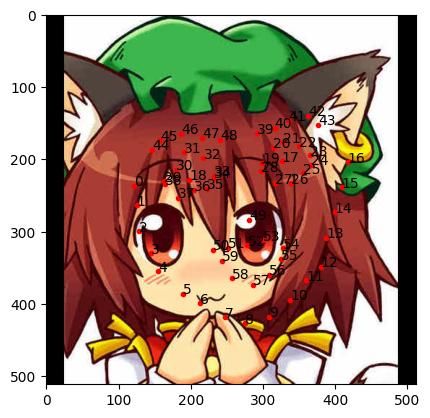

image_tensor torch.Size([1, 3, 196, 196])


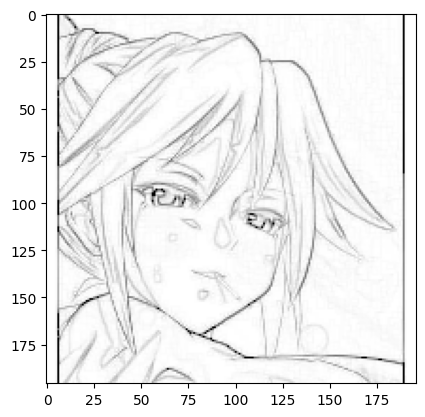

image_nichika_shape (196, 196, 3)
tensor([[0.2032, 0.4361, 0.2063, 0.4943, 0.2265, 0.5586, 0.2468, 0.6319, 0.2730,
         0.6934, 0.3235, 0.7563, 0.3848, 0.7983, 0.4601, 0.8229, 0.5172, 0.8305,
         0.5951, 0.8170, 0.6522, 0.7804, 0.7025, 0.7077, 0.7343, 0.6589, 0.7657,
         0.5788, 0.7724, 0.5054, 0.7720, 0.4408, 0.7637, 0.3641, 0.6039, 0.3839,
         0.3571, 0.4210, 0.5696, 0.3996, 0.5774, 0.3730, 0.6121, 0.3573, 0.6516,
         0.3691, 0.6775, 0.3716, 0.6818, 0.3865, 0.6443, 0.4182, 0.6037, 0.4152,
         0.5777, 0.4239, 0.5561, 0.4151, 0.2895, 0.4293, 0.3129, 0.4035, 0.3429,
         0.3951, 0.3744, 0.4107, 0.4054, 0.4150, 0.4157, 0.4328, 0.3782, 0.4433,
         0.3413, 0.4516, 0.3050, 0.4609, 0.2834, 0.4457, 0.5655, 0.3399, 0.5963,
         0.3074, 0.6428, 0.2896, 0.6696, 0.2914, 0.7080, 0.2880, 0.2420, 0.3376,
         0.2808, 0.3353, 0.3317, 0.3393, 0.3779, 0.3358, 0.4152, 0.3535, 0.4743,
         0.5407, 0.4224, 0.6702, 0.4783, 0.6678, 0.5314, 0.6583, 0.5855, 0.

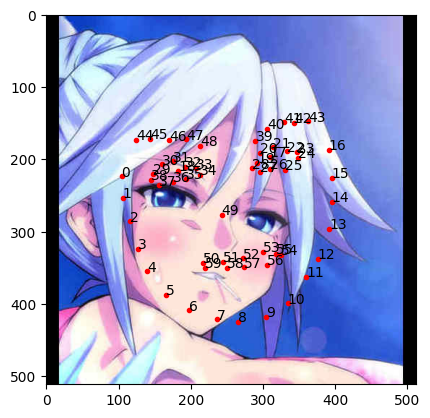

In [7]:
# 線画テスト用
def gray_line_model_test(model,model_path,dataset_path,image_list):
    # モデルの読み込み
    checkpoint = torch.load(model_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    for image_name in image_list:
        with torch.no_grad():
            image = cv2.imread(f"{dataset_path}/{image_name}")
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            # 元画像を保存しておく
            orig_image = image.copy()
            
            # アルゴリズムに通す用の画像の用意
            shape_y,shape_x,_ = orig_image.shape
            # image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (196, 196))
            array = np.asarray(image, np.float32) / 255.0 # [0, 1]
            array = np.expand_dims(array, axis=0)
            array = np.transpose(array, [0, 3, 1, 2]) # PyTorchはNCHW
            
            # 画像をテンソルに変換&グレースケール&マックスプーリング
            image_tensor = torch.as_tensor(array)
            print("image_tensor",image_tensor.shape)
            gray_kernel = torch.as_tensor(
                np.array([0.299, 0.587, 0.114], np.float32).reshape(1,3,1,1))
            
            x = F.conv2d(image_tensor, gray_kernel)
            dilated = F.max_pool2d(x, kernel_size=3, stride=1, padding=1)
            diff = torch.abs(x-dilated) 
            x = 1.0 - diff
            
            img = x.numpy() * 255.0
            img = img.astype(np.uint8)[0,0,:,:]
            _, img = cv2.threshold(img, 100, 0, cv2.THRESH_TOZERO)
            # _, img = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO_INV)
            
            # plt.imshow(binary_img, cmap="gray")
            
            image_nichika = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            plt.imshow(image_nichika)            
            plt.show()
            plt.close()
            
            # モデルに投入
            print("image_nichika_shape",image_nichika.shape)
            image = image_nichika / 255.0
            image = np.transpose(image, (2, 0, 1))
            image = torch.tensor(image, dtype=torch.float)
            image = image.unsqueeze(0).to(DEVICE)
            outputs = model(image)
            print(outputs)
            outputs = outputs.cpu().detach().numpy()
            outputs = outputs.reshape(-1, 2)
            # keypoints = keypoints.reshape(-1, 2)
            keypoints = outputs * [shape_x,shape_y]
            # plt.subplot(3, 4, i+1)
            plt.imshow(orig_image,cmap="gray")
            for p in range(keypoints.shape[0]):
                plt.plot(keypoints[p, 0], keypoints[p, 1], 'r.')
                plt.text(keypoints[p, 0], keypoints[p, 1], f"{p}")
            # plt.axis('off')
            # plt.savefig(f"{save_image_dir}/valid_{image_name}")
            plt.show()
            plt.close()
            
            
            
model_path = "./model_epoch_16300.pth"

model = LandmarkDetector().to(DEVICE)
image_list = os.listdir("/root/dataset/Annotated_High-Resolution_Anime/images")[0:5]
print(image_list)

gray_line_model_test(model,model_path,"/root/dataset/Annotated_High-Resolution_Anime/images",image_list)